In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,recall_score,roc_auc_score,accuracy_score
import numpy as np
import glob
from scipy.stats import ttest_ind,binom_test
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
!pwd

/sise/liorrk-group/OrDanOfir/NLP


In [3]:
def get_ensemble_score(pkl,ensemble_name):
    group = []
    type_mode = []
    Score = []
    Names = []
    for p in pkl:
        if "small" in p:
            n = "small"
        elif "large" in p:
            n = "large"
        else:
            n = "base"
        type_mode.append(n)
        name=p.split("/")[1]
        df=pd.read_pickle(p)
        mae,rmse = mean_absolute_error(df['label_mean'],df['pred_label_mean'])*4,np.sqrt(mean_squared_error(df['label_mean'],df['pred_label_mean']))*4
        
        auc,acc = roc_auc_score((df['label_mean']>0.5).astype(int),df['pred_label_mean']),accuracy_score((df['label_mean']>0.5).astype(int),df['pred_label_mean']>0.6)
        
        r2 = r2_score(df['label_mean'],df['pred_label_mean'])
        X = df[['pred_label_mean']].values
        y = df['label_mean'].values
        x = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        p_value = model.f_pvalue
        group.append(df['pred_label_mean'].tolist())
        Score.append([mae,rmse,p_value,r2,auc,acc])
        Names.append(name)
    RMSE = np.sqrt(mean_squared_error(np.array(group).mean(0), df['label_mean'].values))*4
    MAE = mean_absolute_error(np.array(group).mean(0), df['label_mean'].values)*4
    r2 = r2_score(df['label_mean'],np.array(group).mean(0))
    
    auc,acc = roc_auc_score((df['label_mean']>0.5).astype(int),np.array(group).mean(0)),accuracy_score((df['label_mean']>0.5).astype(int),np.array(group).mean(0)>0.6)
    
    
    
    Score.append([MAE,RMSE,0,r2,auc,acc])
    Names.append("ensemble")
    type_mode.append("ensemble")
    base_df = pd.DataFrame(Score,columns=['mae','rmse','p_vlaue','r2','auc','acc'])
    base_df['model'] = Names
    base_df['type_mode'] = type_mode
    base_df['exp'] = [row.split("/")[0] for row in pkl] + [ensemble_name]
    base_df
    return group,type_mode,y,Score,Names,base_df

# baseline ensemble

In [4]:
pkl = [row for row in glob.glob("outputs_baseline_reg/*/*.pkl") if "_reg" in row]
group,type_mode,y,Score,Names,base_df = get_ensemble_score(pkl,ensemble_name='outputs_baseline_reg')
base_df

,mae,rmse,p_vlaue,r2,auc,acc,model,type_mode,exp
0,0.651327,0.838516,0.0,0.519785,0.862419,0.794684,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_baseline_reg
1,0.647970,0.831309,0.0,0.528006,0.868107,0.792214,microsoft.deberta-v3-base,base,outputs_baseline_reg
2,0.621249,0.794864,0.0,0.568482,0.876917,0.800810,microsoft.deberta-v3-large,large,outputs_baseline_reg
3,0.609520,0.781540,0.0,0.582828,0.881757,0.805849,ensemble,ensemble,outputs_baseline_reg


# toxigen_backtranslate ensemble

In [5]:
pkl = [row for row in glob.glob("outputs_toxigen_backtranslate_reg/*/*.pkl") if "_reg" in row]
group,type_mode,y,Score,Names,toxigen_df = get_ensemble_score(pkl,ensemble_name='outputs_toxigen_backtranslate_reg')
toxigen_df

,mae,rmse,p_vlaue,r2,auc,acc,model,type_mode,exp
0,0.635137,0.822235,0.0,0.538252,0.867417,0.792511,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_toxigen_backtranslate_reg
1,0.620157,0.803247,0.0,0.559333,0.874149,0.795771,microsoft.deberta-v3-base,base,outputs_toxigen_backtranslate_reg
2,0.618794,0.795761,0.0,0.567509,0.877914,0.802885,microsoft.deberta-v3-large,large,outputs_toxigen_backtranslate_reg
3,0.604044,0.776980,0.0,0.587682,0.883249,0.802391,ensemble,ensemble,outputs_toxigen_backtranslate_reg


# backtranslate ensemble

In [6]:
pkl = [row for row in glob.glob("outputs_backtranslate_reg/*/*.pkl") if "_reg" in row]
group,type_mode,y,Score,Names,backtranslate_df = get_ensemble_score(pkl,ensemble_name='outputs_backtranslate_reg')
backtranslate_df

,mae,rmse,p_vlaue,r2,auc,acc,model,type_mode,exp
0,0.639713,0.828003,0.0,0.531751,0.865616,0.791029,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_backtranslate_reg
1,0.636930,0.815290,0.0,0.546020,0.871365,0.793499,microsoft.deberta-v3-base,base,outputs_backtranslate_reg
2,0.614451,0.792086,0.0,0.571494,0.877972,0.804268,microsoft.deberta-v3-large,large,outputs_backtranslate_reg
3,0.604009,0.776581,0.0,0.588105,0.883013,0.804664,ensemble,ensemble,outputs_backtranslate_reg


# ensemble all models

In [7]:
pkl = [row for row in glob.glob("*/*/*.pkl") if "_reg" in row]
group,type_mode,y,Score,Names,all_df = get_ensemble_score(pkl,ensemble_name='all')
all_df = all_df[all_df.model=='ensemble']
all_df

,mae,rmse,p_vlaue,r2,auc,acc,model,type_mode,exp
9,0.597477,0.766629,0.0,0.598595,0.886558,0.808023,ensemble,ensemble,all


In [8]:
df_sum = pd.concat([base_df,toxigen_df,backtranslate_df,all_df])
df_sum

,mae,rmse,p_vlaue,r2,auc,acc,model,type_mode,exp
0,0.651327,0.838516,0.0,0.519785,0.862419,0.794684,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_baseline_reg
1,0.647970,0.831309,0.0,0.528006,0.868107,0.792214,microsoft.deberta-v3-base,base,outputs_baseline_reg
2,0.621249,0.794864,0.0,0.568482,0.876917,0.800810,microsoft.deberta-v3-large,large,outputs_baseline_reg
3,0.609520,0.781540,0.0,0.582828,0.881757,0.805849,ensemble,ensemble,outputs_baseline_reg
0,0.635137,0.822235,0.0,0.538252,0.867417,0.792511,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_toxigen_backtranslate_reg
1,0.620157,0.803247,0.0,0.559333,0.874149,0.795771,microsoft.deberta-v3-base,base,outputs_toxigen_backtranslate_reg
2,0.618794,0.795761,0.0,0.567509,0.877914,0.802885,microsoft.deberta-v3-large,large,outputs_toxigen_backtranslate_reg
3,0.604044,0.776980,0.0,0.587682,0.883249,0.802391,ensemble,ensemble,outputs_toxigen_backtranslate_reg
0,0.639713,0.828003,0.0,0.531751,0.865616,0.791029,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,outputs_backtranslate_reg
1,0.636930,0.815290,0.0,0.546020,0.871365,0.793499,microsoft.deberta-v3-base,base,outputs_backtranslate_reg


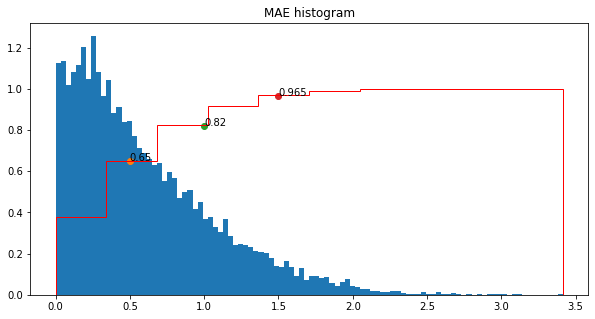

In [9]:
plt.figure(figsize=[10,5])
A = abs(np.array(group).mean(0)-y)*4
plt.hist(A,density=True,bins=100)
plt.hist(A,density=True, cumulative=True, label='CDF', histtype='step',color='red')
plt.scatter([0.5],[0.65])
plt.annotate("0.65",[0.5,0.65])
plt.scatter([1],[0.82])
plt.annotate("0.82",[1,0.82])
plt.scatter([1.5],[0.965])
plt.annotate("0.965",[1.5,0.965])
plt.title("MAE histogram")
plt.show()

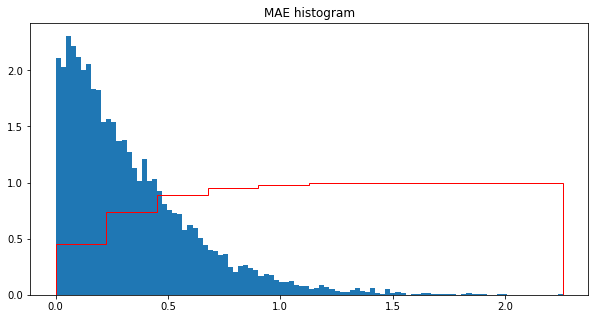

In [10]:
plt.figure(figsize=[10,5])
A = abs(np.array(group)[5]-np.array(group)[0])*4
plt.hist(A,density=True,bins=100)
plt.hist(A,density=True, cumulative=True, label='CDF', histtype='step',color='red')
plt.title("MAE histogram")
plt.show()

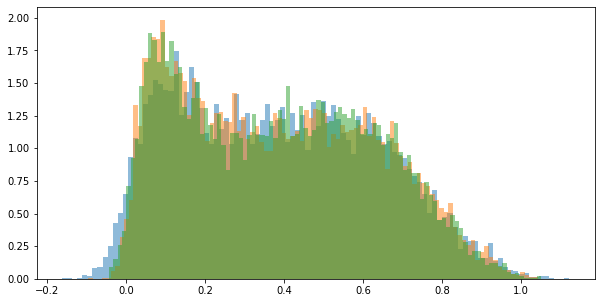

In [11]:
plt.figure(figsize=[10,5])
for g in group[2:5]:
    plt.hist(g,density=True,bins=100,alpha=0.5)


(array([ 14.,  54., 154., 343., 568., 734., 703., 455., 162.,  37.]),
 array([0.17224118, 0.57519072, 0.97814027, 1.38108981, 1.78403935,
        2.18698889, 2.58993844, 2.99288798, 3.39583752, 3.79878707,
        4.20173661]),
 <BarContainer object of 10 artists>)

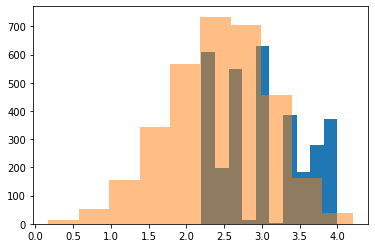

In [12]:
plt.hist(y[np.where(y*4>2)]*4)
plt.hist(np.array(group).mean(0)[np.where(y*4>2)]*4,alpha=0.5)

In [13]:
from sklearn.metrics import PrecisionRecallDisplay

'outputs_baseline_reg_small'

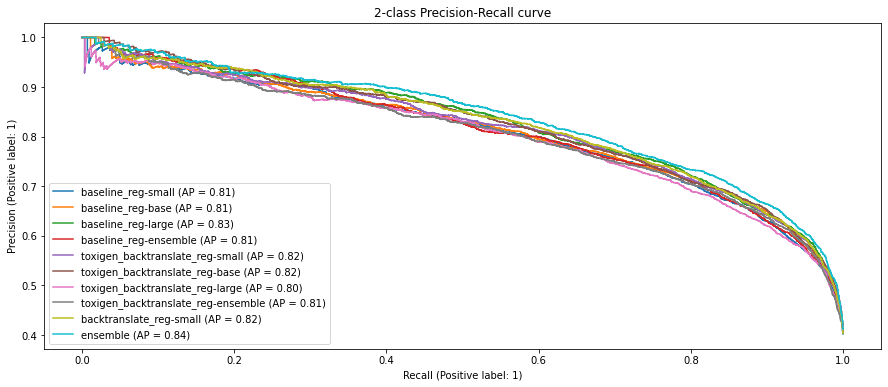

In [47]:
plt.figure(figsize=[15,6])
for i,(n,g) in enumerate(zip(Names,group)):
    # if "baseline" in df_sum.reset_index(drop=True).iloc[i]['exp'].replace("outputs_","").replace("reg_",""):
        display = PrecisionRecallDisplay.from_predictions((y>=0.5).astype(int),
                                                          g,
                                                          name = df_sum.reset_index(drop=True).iloc[i]['exp'].replace("outputs_","").replace("reg_","") +"-"+ df_sum.reset_index(drop=True).iloc[i]['type_mode']
                                                          ,ax=plt.gca()
                                                         )
display = PrecisionRecallDisplay.from_predictions((y>=0.5).astype(int),
                                                  np.array(group).mean(0),
                                                  name = 'ensemble',ax=plt.gca()
                                                 )
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [48]:
# from scipy import stats
# stats.friedmanchisquare(group1, group2, group3)